In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [68]:
titanic_df=pd.read_csv('train_full.csv')

In [69]:
sum(titanic_df.survived)

500

In [153]:
titanic_df['gender']= (titanic_df['sex'] == 'female')

In [106]:
titanic_df[ titanic_df["pclass"] == 3 ].fare.mean()

13.302888700564957

In [71]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [83]:
titanic_df.groupby('pclass').count()

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
pclass,,,,,,,,,,,,,
1,323,323,323,284,323,323,323,323,256,321,201,35,289
2,277,277,277,261,277,277,277,277,23,277,112,31,261
3,709,709,709,501,709,709,709,708,16,709,173,55,195


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

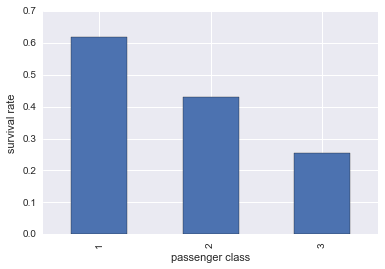

In [86]:
ax = titanic_df.groupby('pclass').survived.mean().plot(kind='bar')
ax.set_xlabel("passenger class")
ax.set_ylabel("survival rate")

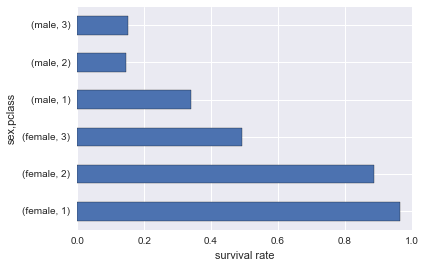

In [88]:
ax = titanic_df.groupby(['sex','pclass']).survived.mean().plot(kind='barh')
ax.set_xlabel("survival rate")

In [89]:
death_counts=pd.crosstab([titanic_df.Pclass, titanic_df.Sex], titanic_df.Survived.astype(bool))
death_counts.plot(kind='bar',stacked=True, color=['black','gold'],grid=False)

AttributeError: 'DataFrame' object has no attribute 'Pclass'

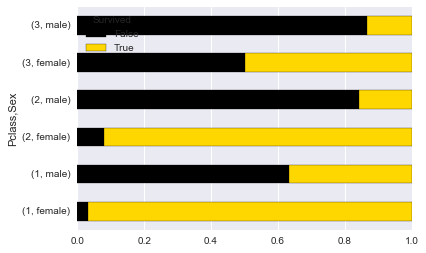

In [107]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

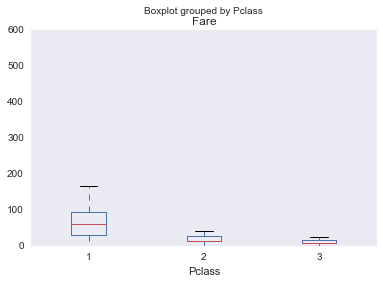

In [10]:
titanic_df.boxplot(column='Fare', by='Pclass',grid=False)

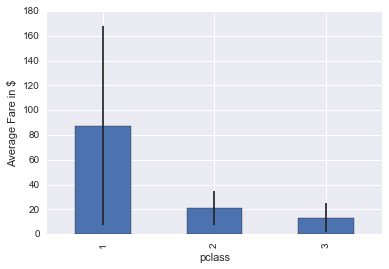

In [100]:
ax = titanic_df.groupby("pclass")['fare'].mean().plot(kind='bar',yerr=titanic_df.groupby('pclass')['fare'].std())
ax.set_ylabel("Average Fare in $")

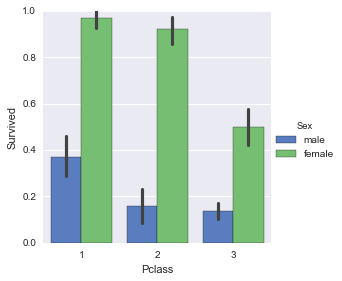

In [12]:
sns.factorplot(y='Survived',x='Pclass',hue='Sex',data=titanic_df,kind='bar',size=4,palette='muted',aspect=1)

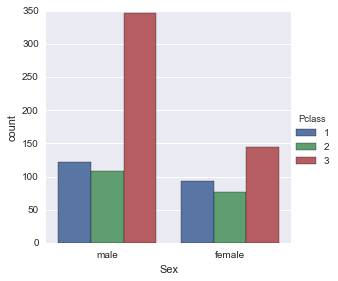

In [13]:
sns.factorplot(x='Sex',kind='count',data=titanic_df, hue='Pclass')

In [109]:
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex
    

In [110]:
titanic_df['person']=titanic_df[['age','sex']].apply(male_female_child,axis=1)

In [16]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


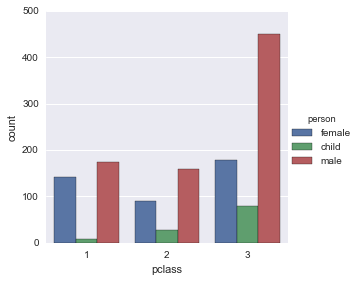

In [115]:
sns.factorplot('pclass',data=titanic_df,hue='person',kind='count')

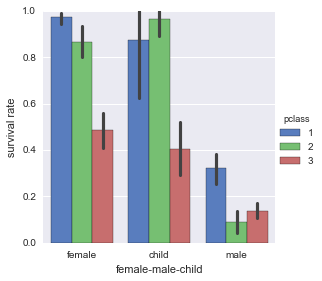

In [123]:
ax = sns.factorplot(y='survived',x='person',hue='pclass',data=titanic_df,kind='bar',size=4,palette='muted',aspect=1)
ax.set(xlabel='female-male-child', ylabel='survival rate')

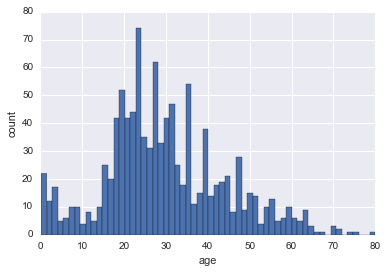

In [127]:
ax = titanic_df['age'].hist(bins=60)
ax.set_xlabel('age')
ax.set_ylabel('count')

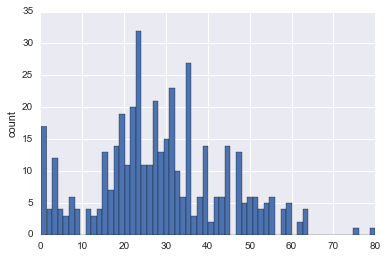

In [158]:
ax = titanic_df[titanic_df['survived']==1]['age'].hist(bins=60)

ax.set_ylabel('count')

In [159]:
titanic_df[titanic_df['survived']==1]['age']

0       29.0000
1        0.9167
5       48.0000
6       63.0000
8       53.0000
11      18.0000
12      24.0000
13      26.0000
14      80.0000
17      50.0000
18      32.0000
20      37.0000
21      47.0000
22      26.0000
23      42.0000
24      29.0000
26      25.0000
27      19.0000
28      35.0000
29      28.0000
31      40.0000
32      30.0000
33      58.0000
35      45.0000
36      22.0000
37          NaN
41      44.0000
42      59.0000
43      60.0000
44      41.0000
         ...   
1159        NaN
1162        NaN
1182    21.0000
1187     1.0000
1188    24.0000
1189     4.0000
1190    25.0000
1196    29.0000
1198        NaN
1205    18.0000
1216        NaN
1223    23.0000
1228    31.0000
1232    16.0000
1233    44.0000
1236    14.0000
1238    25.0000
1240     0.4167
1244    16.0000
1247        NaN
1254    25.0000
1256     7.0000
1257     9.0000
1258    29.0000
1260    18.0000
1261    63.0000
1277    22.0000
1286    38.0000
1290    47.0000
1300    15.0000
Name: age, dtype: float6

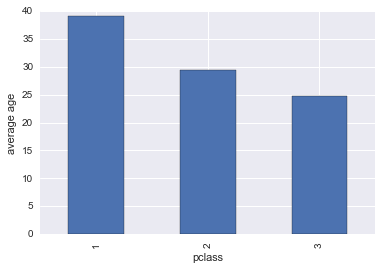

In [145]:
ax = titanic_df.groupby('pclass')['age'].mean().plot(kind='bar')
ax.set_xlabel('pclass')
ax.set_ylabel('average age')

In [146]:
titanic_df.groupby('pclass')['age'].mean()

pclass
1    39.159918
2    29.506705
3    24.816367
Name: age, dtype: float64

In [20]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

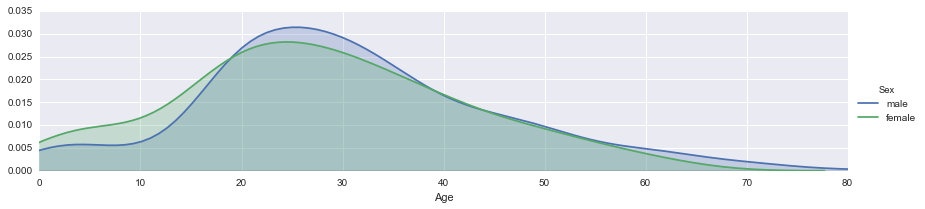

In [21]:
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

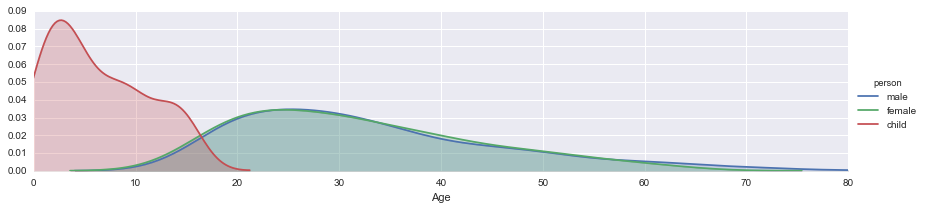

In [22]:
fig=sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

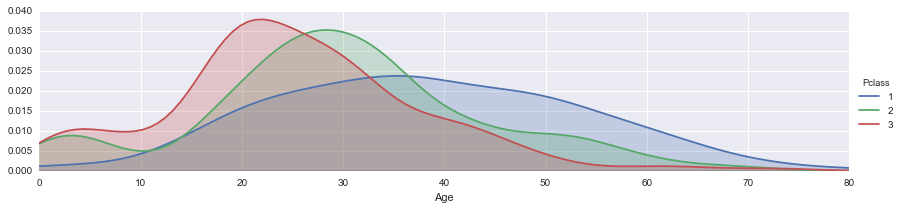

In [23]:
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [24]:
deck=titanic_df['Cabin'].dropna()

In [25]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

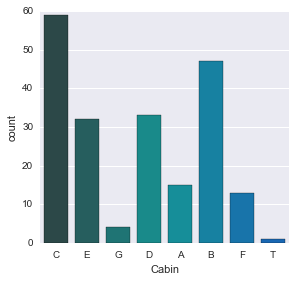

In [26]:
levels=[]
for level in deck:
    levels.append(level[0])

cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']

sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

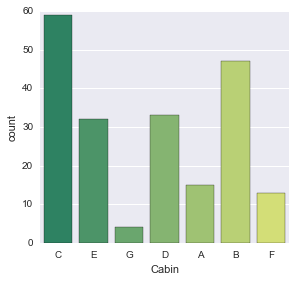

In [27]:
cabin_df=cabin_df[cabin_df.Cabin!='T']
sns.factorplot('Cabin',data=cabin_df,palette='summer',kind='count')

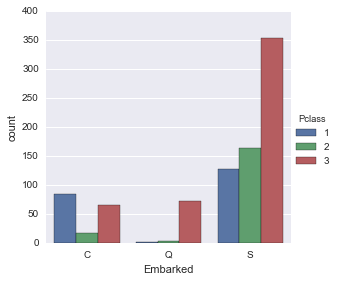

In [28]:
sns.factorplot('Embarked',data=titanic_df, hue='Pclass',order=['C','Q','S'],kind='count')

In [29]:
titanic_df['Alone']=titanic_df.SibSp+titanic_df.Parch

In [30]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [31]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'

F:\anaconda\lib\site-packages\pandas\core\indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,person,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",female,False
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",child,False
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",child,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",male,False
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",female,False
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",male,False
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",female,False
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",male,False
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",female,False
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",male,False


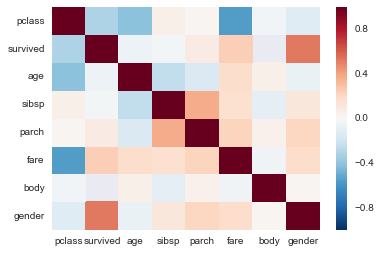

In [154]:

corr = titanic_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


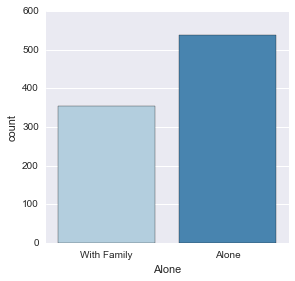

In [33]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')

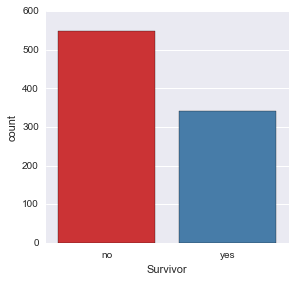

In [34]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})

sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind='count')

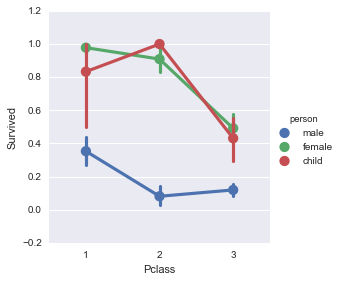

In [35]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

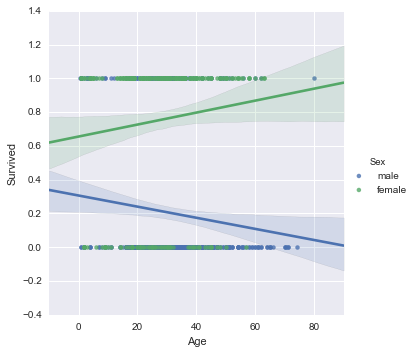

In [36]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df)

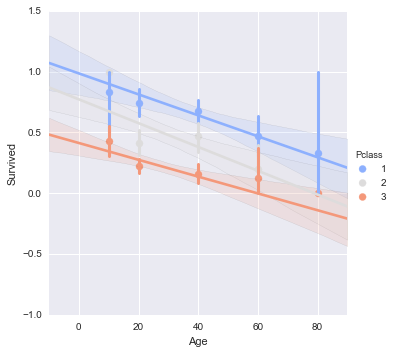

In [37]:
generations=[10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='coolwarm',x_bins=generations)

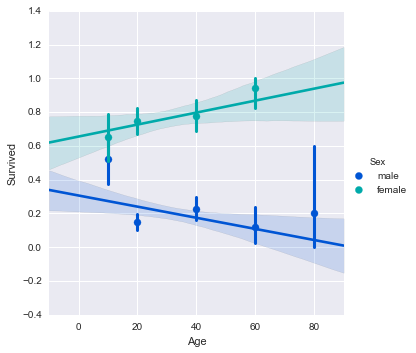

In [38]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [39]:
deck=titanic_df['Cabin'].dropna()





In [40]:
levels=['A','B','C','D','E','F']


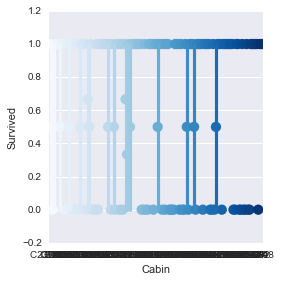

In [41]:
sns.factorplot('Cabin','Survived',data=titanic_df,palette='Blues',x_bins=levels)